<center> 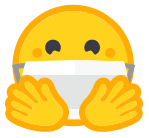

# <span style="color:orange"> <center> Hugging Face in AUTO Mode To-The-Rescue! </span>



#### This Notebook shows how we can use Hugging Face auto commands as much as we can to reduce hustle.

### <span style="color:green">Advantages:</span>
* No need to hand coding sequences differently to satisfy the need of tokenizers of different BERT models

* BERT models can be changed just by changing a global ```model_name``` variable and Hugging Face API will take care of the rest

### If this notebook is useful to you please upvote, thank you! 

Hugging Face Auto modules are actively under development, if something new is added to their library, that I missed, please point it out!

## Import Packages

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel

## Get Data

In [ ]:
train_data = pd.read_csv('/kaggle/input/zenify-tweet-train-folds/train_folds.csv')
train_data.head()

## <span style="color:green">Global Variables</span>

---

### Available Models

**Disclaimer**: Most popular models are compatible, but not all. Just change the ```model_name``` to check if it is.

```
bert-base-uncased
bert-large-uncased
bert-base-cased
bert-large-cased
bert-base-multilingual-uncased
bert-base-multilingual-cased
bert-base-chinese
bert-base-german-cased
bert-large-uncased-whole-word-masking
bert-large-cased-whole-word-masking
bert-large-uncased-whole-word-masking-finetuned-squad
bert-large-cased-whole-word-masking-finetuned-squad
bert-base-cased-finetuned-mrpc
bert-base-german-dbmdz-cased
bert-base-german-dbmdz-uncased
bert-base-japanese
bert-base-japanese-whole-word-masking
bert-base-japanese-char
bert-base-japanese-char-whole-word-masking
bert-base-finnish-cased-v1
bert-base-finnish-uncased-v1
bert-base-dutch-cased
openai-gpt
gpt2
gpt2-medium
gpt2-large
gpt2-xl
transfo-xl-wt103
xlnet-base-cased
xlnet-large-cased
xlm-mlm-en-2048
xlm-mlm-ende-1024
xlm-mlm-enfr-1024
xlm-mlm-enro-1024
xlm-mlm-xnli15-1024
xlm-mlm-tlm-xnli15-1024
xlm-clm-enfr-1024
xlm-clm-ende-1024
xlm-mlm-17-1280
xlm-mlm-100-1280
roberta-base
roberta-large
roberta-large-mnli
distilroberta-base
roberta-base-openai-detector
roberta-large-openai-detector
distilbert-base-uncased
distilbert-base-uncased-distilled-squad
distilbert-base-cased
distilbert-base-cased-distilled-squad
distilgpt2
distilbert-base-german-cased
distilbert-base-multilingual-cased
ctrl
camembert-base
albert-base-v1
albert-large-v1
albert-xlarge-v1
albert-xxlarge-v1
albert-base-v2
albert-large-v2
albert-xlarge-v2
albert-xxlarge-v2
t5-small
t5-base
t5-large
t5-3B
t5-11B
xlm-roberta-base
xlm-roberta-large
flaubert-small-cased
flaubert-base-uncased
flaubert-base-cased
flaubert-large-cased
bart-large
bart-large-mnli
bart-large-cnn
mbart-large-en-ro
DialoGPT-small
DialoGPT-medium
DialoGPT-large

```



In [ ]:
model_name = "roberta-base"
sanitycheck_model_names = ['bert-base-uncased','bert-large-uncased','bert-base-cased',
                    'bert-large-cased','bert-base-multilingual-uncased',
                    'bert-base-multilingual-cased','roberta-base','roberta-large',
                    'albert-base-v1','albert-large-v1','albert-xlarge-v1']

## <span style="color:green">Define Tokenizer</span> 
```AutoTokenizer```

---

***Note***: 

1. To find how to estimate "offset" in auto settings, I had to dig a lot. It was recently added as a part of PreTrainedTokenizerFirst (https://github.com/huggingface/transformers/pull/2674). Please look at this thread for more details.

2. Offset estimation is not implemented in ```albert``` models. Therefore, you have to set ```return_offsets_mapping=False``` for ```albert``` models

3. RoBERTa does not have a ```token_type_ids```. Remember from their paper that ```RoBERTa``` dropped second sentence prediction from the architecture, so just set all token ids to ```1```!!

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

for train_index in range(5):
    question = train_data.sentiment[train_index]
    answer = train_data.text[train_index]
    encoded_input = tokenizer.encode_plus(question, answer, add_special_tokens=True, return_offsets_mapping=True)
    try:
        print("\nQuestion: " + question + ', Answer: ' + answer)
        print("Encoded Input: " + str(encoded_input['input_ids']))
        print("Attention Mask: " + str(encoded_input['attention_mask']))
        print("Offset: " + str(encoded_input['offset_mapping']))
        print("Token Type Ids: " + str(encoded_input['token_type_ids']))
    except:
        pass
    

### Sanity Check Tokenizer

In [ ]:
for model_ in sanitycheck_model_names:
    print("\nModel: " + model_)
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_, use_fast=True)
        question = train_data.sentiment[0]
        answer = train_data.text[0]
    
        if model_ in ["albert-base-v1", "albert-large-v1", "albert-xlarge-v1"]:
            encoded_input = tokenizer.encode_plus(question, answer, add_special_tokens=True, return_offsets_mapping=False)        
        else:
            encoded_input = tokenizer.encode_plus(question, answer, add_special_tokens=True, return_offsets_mapping=True)
            
        print("Question: " + question + ', Answer: ' + answer)
        print("Encoded Input: " + str(encoded_input['input_ids']))
        print("Attention Mask: " + str(encoded_input['attention_mask']))
        print("Offset: " + str(encoded_input['offset_mapping']))
        print("Token Type Ids: " + str(encoded_input['token_type_ids']))
    except:
        pass

## Define Model

```AutoModel```

---

In [ ]:
model = AutoModel.from_pretrained(model_name)

In [ ]:
for model_ in sanitycheck_model_names:
    print("\nModel: " + model_)
    try:
        model = AutoModel.from_pretrained(model_)
        print("Model successfully loaded!")
        del model
    except:
        pass

Some excellent examples are available here: https://huggingface.co/transformers/usage.html

If you think I missed something, please let me know in the comment so that I can add in the future.

# NEXT: Do your own transfer learning! Thank you!
